# Clustering

## Stations: amount of bookings vs temperature

### Preparation

In [40]:
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

#clustering
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D

import warnings;
warnings.filterwarnings('ignore');

In [14]:
booking_set = pd.read_csv("DataBase_WeatherRentalAmountStations_UTC.csv")


In [5]:
booking_set

,Unnamed: 0,Temperature,TotalCloudCover,PrecipitationHeight,MeanWindSpeed,Month,Weekday,Hour,START_RENTAL_ZONE,Rentals
0,2014-12-31 23:00:00,1.2,8,0.0,1.8,12,3,23,Roßmarkt / An der Hauptwache,1
1,2014-12-31 23:00:00,1.2,8,0.0,1.8,12,3,23,Speyerer Straße / Koblenzer Straße,1
2,2014-12-31 23:00:00,1.2,8,0.0,1.8,12,3,23,Woolworth Leipziger Strasse,1
3,2015-01-01 00:00:00,1.2,8,0.0,1.6,1,4,0,Alte Brücke / Mainkai,1
4,2015-01-01 00:00:00,1.2,8,0.0,1.6,1,4,0,Eschersheimer Landstraße / Fritz-Tarnow-Straße,1
...,...,...,...,...,...,...,...,...,...,...
705755,2016-12-31 22:00:00,-3.7,8,0.0,2.1,12,6,22,DB Netz,1
705756,2016-12-31 22:00:00,-3.7,8,0.0,2.1,12,6,22,Hauptbahnhof Haupteingang (Vorplatz),1
705757,2016-12-31 22:00:00,-3.7,8,0.0,2.1,12,6,22,Krifteler Straße / Lahnstraße,1
705758,2016-12-31 22:00:00,-3.7,8,0.0,2.1,12,6,22,Sternstraße / Unterweg,2


In [12]:
booking_set.START_RENTAL_ZONE.nunique()

324

In [30]:
a = booking_set.groupby(['START_RENTAL_ZONE'], as_index = False)['Rentals'].count()

In [25]:
a

,START_RENTAL_ZONE,Rentals
0,Ackermannstraße / Cordierstraße,671
1,Ackermannstraße / Kleyerstraße,347
2,Adalberstraße / Hamburger Allee,1997
3,Adalbertstraße / Schlossstraße,4571
4,Adam-Riese-Platz / Hafenstraße,4579
...,...,...
319,Woolworth Leipziger Strasse,5265
320,Ziegelhüttenplatz / Ziegelhüttenweg,3884
321,Zum Brommenhof / Gerbermühlstraße,1290
322,Zum Pfarrturm / Saalgasse,858


In [28]:
b = booking_set.groupby(['START_RENTAL_ZONE'], as_index = False)['Temperature'].mean()

In [29]:
b

,START_RENTAL_ZONE,Temperature
0,Ackermannstraße / Cordierstraße,15.283607
1,Ackermannstraße / Kleyerstraße,13.170893
2,Adalberstraße / Hamburger Allee,13.582924
3,Adalbertstraße / Schlossstraße,14.157887
4,Adam-Riese-Platz / Hafenstraße,13.914960
...,...,...
319,Woolworth Leipziger Strasse,13.971928
320,Ziegelhüttenplatz / Ziegelhüttenweg,14.269361
321,Zum Brommenhof / Gerbermühlstraße,14.603333
322,Zum Pfarrturm / Saalgasse,15.985082


In [32]:
temp = pd.concat([a, b], axis=1)

In [35]:
temp = temp.set_index('START_RENTAL_ZONE')

In [36]:
temp

,Rentals,Temperature
START_RENTAL_ZONE,,
"(Ackermannstraße / Cordierstraße, Ackermannstraße / Cordierstraße)",671,15.283607
"(Ackermannstraße / Kleyerstraße, Ackermannstraße / Kleyerstraße)",347,13.170893
"(Adalberstraße / Hamburger Allee, Adalberstraße / Hamburger Allee)",1997,13.582924
"(Adalbertstraße / Schlossstraße, Adalbertstraße / Schlossstraße)",4571,14.157887
"(Adam-Riese-Platz / Hafenstraße, Adam-Riese-Platz / Hafenstraße)",4579,13.914960
...,...,...
"(Woolworth Leipziger Strasse, Woolworth Leipziger Strasse)",5265,13.971928
"(Ziegelhüttenplatz / Ziegelhüttenweg, Ziegelhüttenplatz / Ziegelhüttenweg)",3884,14.269361
"(Zum Brommenhof / Gerbermühlstraße, Zum Brommenhof / Gerbermühlstraße)",1290,14.603333


### K-Means

In [37]:
scaler = StandardScaler()
scaler.fit(temp)
X_scaled = scaler.transform(temp)
X_scaled_df = pd.DataFrame(X_scaled, columns=temp.columns, index=temp.index)
X_scaled_df.head()

,Rentals,Temperature
START_RENTAL_ZONE,,
"(Ackermannstraße / Cordierstraße, Ackermannstraße / Cordierstraße)",-0.689754,0.149440
"(Ackermannstraße / Kleyerstraße, Ackermannstraße / Kleyerstraße)",-0.838022,-0.886222
"(Adalberstraße / Hamburger Allee, Adalberstraße / Hamburger Allee)",-0.082953,-0.684242
"(Adalbertstraße / Schlossstraße, Adalbertstraße / Schlossstraße)",1.094954,-0.402393
"(Adam-Riese-Platz / Hafenstraße, Adam-Riese-Platz / Hafenstraße)",1.098615,-0.521477


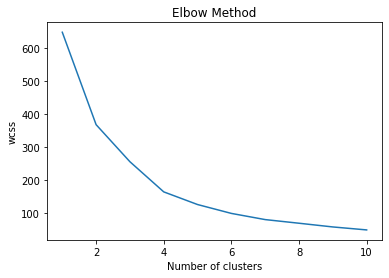

In [38]:
#check for optimal amount of clusters
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X_scaled_df)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

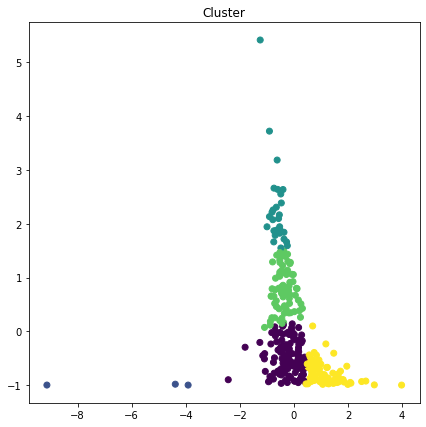

In [44]:
#plot the k-means
means = KMeans(n_clusters=5, init='k-means++', max_iter=300, algorithm='auto')
means.fit(X_scaled_df)
means.predict(X_scaled_df)
x_pred = means.predict(X_scaled_df)
plt.subplots(1, 1, figsize=(7,7))
plt.scatter(X_scaled[:, 1], X_scaled[:, 0], c=x_pred)
plt.title("Cluster")

plt.show()

### Hierarchical Clustering

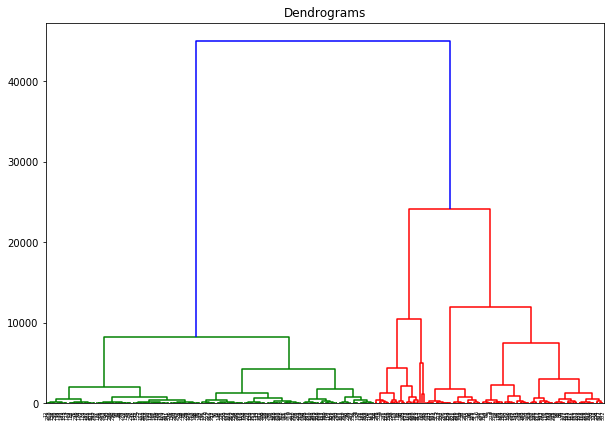

In [47]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(temp, method='ward'))

In [48]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(temp)

array([1, 1, 3, 2, 2, 0, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 3, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 3, 1, 3, 1, 3, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 0, 2,
       2, 0, 1, 1, 1, 1, 1, 3, 2, 1, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1,
       1, 1, 3, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 2, 3, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1,
       0, 1, 0, 3, 1, 3, 1, 1, 0, 3, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 3, 2,
       1, 1, 1, 1, 1, 2, 2, 3, 1, 3, 1, 3, 3, 3, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 3, 0, 0, 2, 2, 2, 2, 1, 1, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 3, 2, 0, 1, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 3, 1, 3, 2, 1,
       0, 3, 0, 2, 0, 1, 2, 3, 1, 2, 2, 1, 1, 0, 1,

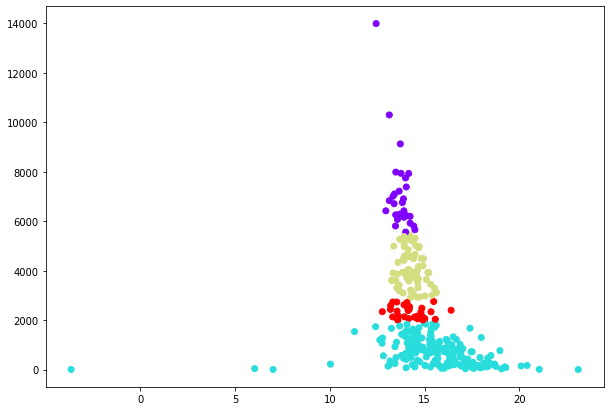

In [50]:
plt.figure(figsize=(10, 7))
plt.scatter(temp['Temperature'], temp['Rentals'], c=cluster.labels_, cmap='rainbow')

### Without Outliers

In [52]:
indexNames = temp[ temp['Rentals'] > 12000 ].index

In [53]:
indexNames

Index([('Hauptbahnhof Haupteingang (Vorplatz)', 'Hauptbahnhof Haupteingang (Vorplatz)')], dtype='object', name='START_RENTAL_ZONE')

In [54]:
temp = temp.drop(indexNames)

In [57]:
indexNames = temp[ temp['Temperature'] < 5 ].index

In [58]:
indexNames

Index([('BSC Repeater', 'BSC Repeater')], dtype='object', name='START_RENTAL_ZONE')

In [59]:
temp = temp.drop(indexNames)

#### K-Means

In [60]:
scaler = StandardScaler()
scaler.fit(temp)
X_scaled = scaler.transform(temp)
X_scaled_df = pd.DataFrame(X_scaled, columns=temp.columns, index=temp.index)
X_scaled_df.head()

,Rentals,Temperature
START_RENTAL_ZONE,,
"(Ackermannstraße / Cordierstraße, Ackermannstraße / Cordierstraße)",-0.707868,0.136129
"(Ackermannstraße / Kleyerstraße, Ackermannstraße / Kleyerstraße)",-0.863113,-1.066688
"(Adalberstraße / Hamburger Allee, Adalberstraße / Hamburger Allee)",-0.072511,-0.832109
"(Adalbertstraße / Schlossstraße, Adalbertstraße / Schlossstraße)",1.160828,-0.504770
"(Adam-Riese-Platz / Hafenstraße, Adam-Riese-Platz / Hafenstraße)",1.164661,-0.643074


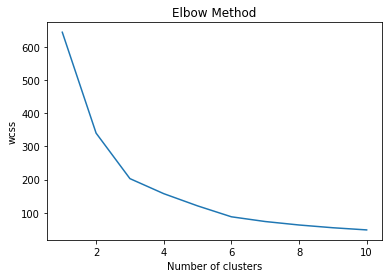

In [61]:
#check for optimal amount of clusters
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X_scaled_df)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

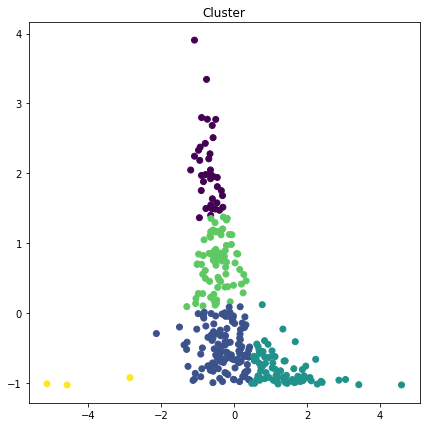

In [62]:
#plot the k-means
means = KMeans(n_clusters=5, init='k-means++', max_iter=300, algorithm='auto')
means.fit(X_scaled_df)
means.predict(X_scaled_df)
x_pred = means.predict(X_scaled_df)
plt.subplots(1, 1, figsize=(7,7))
plt.scatter(X_scaled[:, 1], X_scaled[:, 0], c=x_pred)
plt.title("Cluster")

plt.show()

#### Hierarchical Clustering

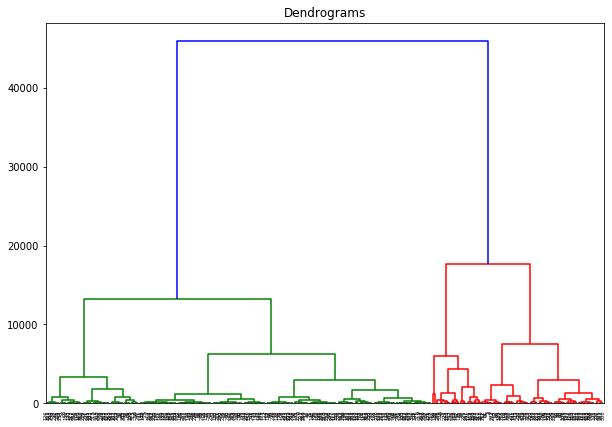

In [63]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(temp, method='ward'))

In [64]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(temp)

array([1, 1, 3, 0, 0, 2, 3, 1, 3, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 3, 1, 1, 0, 3, 3, 3, 2, 3, 1, 2, 1, 1,
       1, 2, 3, 1, 3, 1, 3, 0, 1, 1, 1, 3, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 1, 1, 3, 0, 3, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 3, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 0, 3, 0, 2, 0, 0, 1, 0, 0,
       3, 1, 1, 0, 2, 1, 0, 3, 0, 0, 1, 1, 1, 1, 0, 1, 3, 1, 1, 1, 0, 2,
       0, 1, 1, 1, 1, 0, 1, 1, 3, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 2, 3, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 2, 1, 1, 2, 1,
       2, 3, 1, 3, 1, 3, 2, 3, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1,
       1, 1, 1, 0, 0, 3, 1, 3, 1, 3, 3, 3, 1, 1, 0, 1, 1, 0, 1, 1, 1, 3,
       2, 2, 0, 0, 0, 0, 1, 1, 1, 2, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 3, 0, 2, 1, 3, 1, 1, 3, 1, 1, 1, 2, 3, 1, 1, 3, 1, 1, 1,
       1, 3, 1, 0, 3, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 3, 1, 3, 0, 1, 2, 3,
       2, 0, 2, 1, 0, 3, 3, 0, 0, 1, 1, 2, 1, 1, 0,

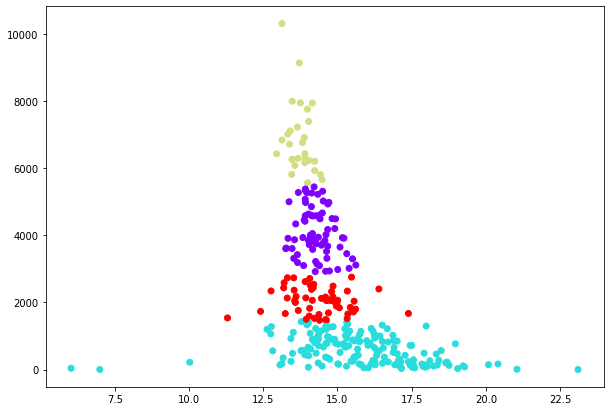

In [65]:
plt.figure(figsize=(10, 7))
plt.scatter(temp['Temperature'], temp['Rentals'], c=cluster.labels_, cmap='rainbow')

## Rentals with temp

In [67]:
bookings_temp = booking_set.groupby(['Temperature'], as_index = False)['Rentals'].count()
bookings_temp

,Temperature,Rentals
0,-7.2,3
1,-7.1,133
2,-6.9,35
3,-6.7,21
4,-6.5,6
...,...,...
425,37.4,45
426,37.5,102
427,37.6,78
428,37.8,129


### K-Means

In [68]:
scaler = StandardScaler()
scaler.fit(bookings_temp)
X_scaled = scaler.transform(bookings_temp)
X_scaled_df = pd.DataFrame(X_scaled, columns=bookings_temp.columns, index=bookings_temp.index)
X_scaled_df.head()

,Temperature,Rentals
0,-1.750592,-1.418996
1,-1.742598,-1.306399
2,-1.726610,-1.391280
3,-1.710622,-1.403406
4,-1.694634,-1.416398


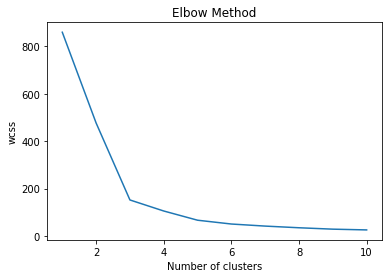

In [69]:
#check for optimal amount of clusters
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X_scaled_df)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

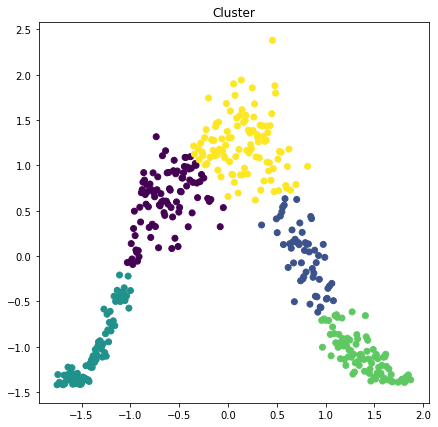

In [71]:
#plot the k-means
means = KMeans(n_clusters=5, init='k-means++', max_iter=300, algorithm='auto')
means.fit(X_scaled_df)
means.predict(X_scaled_df)
x_pred = means.predict(X_scaled_df)
plt.subplots(1, 1, figsize=(7,7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=x_pred)
plt.title("Cluster")

plt.show()

### Hierarchical Clustering

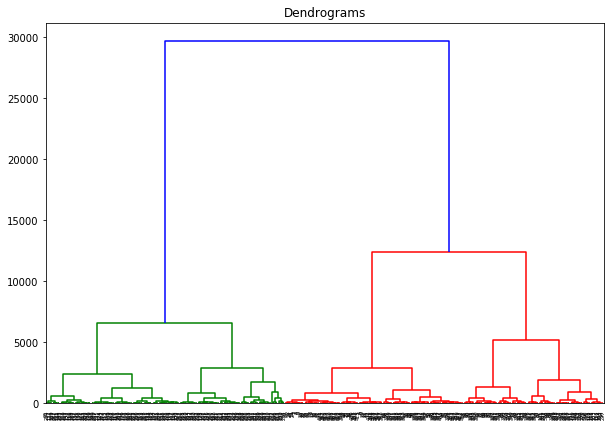

In [72]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(bookings_temp, method='ward'))

In [73]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(bookings_temp)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 1, 3, 3, 0, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 1, 0, 3, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 0, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3,
       3, 1, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 0, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1,
       3, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 3, 1, 1,
       1, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 1, 3, 0, 1, 3, 1, 3, 1, 3, 3,
       0, 3, 3, 3, 3, 3, 0, 1, 0, 3, 0, 0, 0, 0, 0,

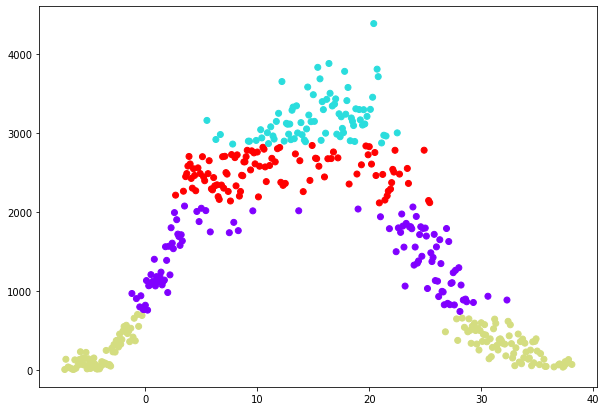

In [74]:
plt.figure(figsize=(10, 7))
plt.scatter(bookings_temp['Temperature'], bookings_temp['Rentals'], c=cluster.labels_, cmap='rainbow')

## Stations to Bookings to Precipitation

### Preparation

In [91]:
bookings_precpt_a = booking_set.groupby(['START_RENTAL_ZONE'], as_index = False)['Rentals'].count()
bookings_precpt_b = booking_set.groupby(['START_RENTAL_ZONE'], as_index = False)['PrecipitationHeight'].mean()
bookings_precpt = pd.concat([bookings_precpt_a, bookings_precpt_b], axis=1)

In [92]:
bookings_precpt = bookings_precpt.set_index('START_RENTAL_ZONE')

### K-Means

In [93]:
scaler = StandardScaler()
scaler.fit(bookings_precpt)
X_scaled = scaler.transform(bookings_precpt)
X_scaled_df = pd.DataFrame(X_scaled, columns=bookings_precpt.columns, index=bookings_precpt.index)
X_scaled_df.head()

,Rentals,PrecipitationHeight
START_RENTAL_ZONE,,
"(Ackermannstraße / Cordierstraße, Ackermannstraße / Cordierstraße)",-0.689754,-0.767249
"(Ackermannstraße / Kleyerstraße, Ackermannstraße / Kleyerstraße)",-0.838022,-0.827702
"(Adalberstraße / Hamburger Allee, Adalberstraße / Hamburger Allee)",-0.082953,0.298106
"(Adalbertstraße / Schlossstraße, Adalbertstraße / Schlossstraße)",1.094954,0.159506
"(Adam-Riese-Platz / Hafenstraße, Adam-Riese-Platz / Hafenstraße)",1.098615,0.116639


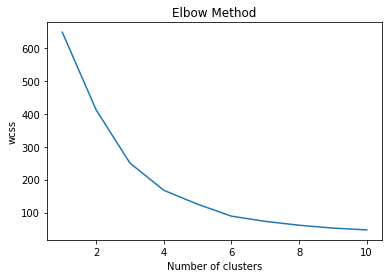

In [94]:
#check for optimal amount of clusters
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X_scaled_df)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

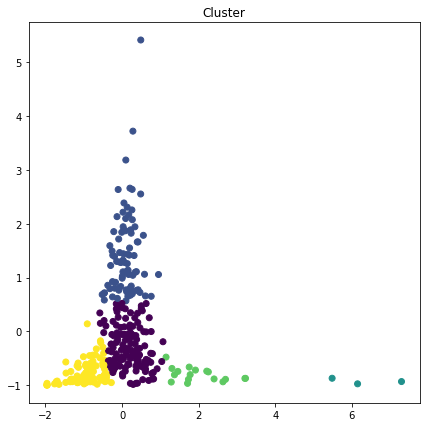

In [95]:
#plot the k-means
means = KMeans(n_clusters=5, init='k-means++', max_iter=300, algorithm='auto')
means.fit(X_scaled_df)
means.predict(X_scaled_df)
x_pred = means.predict(X_scaled_df)
plt.subplots(1, 1, figsize=(7,7))
plt.scatter(X_scaled[:, 1], X_scaled[:, 0], c=x_pred)
plt.title("Cluster")

plt.show()

### Hierarchical Clustering

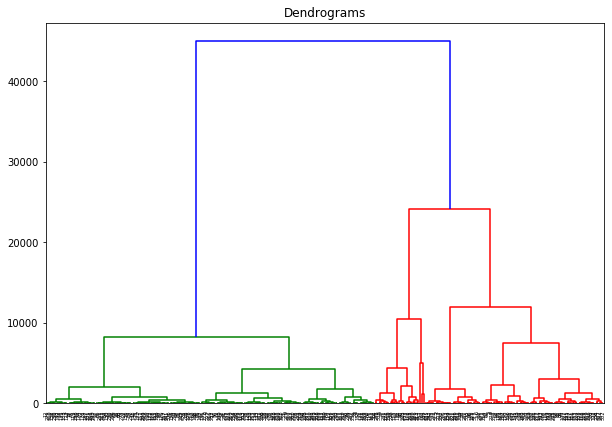

In [96]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(bookings_precpt, method='ward'))

In [97]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(bookings_precpt)

array([1, 1, 3, 2, 2, 0, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 3, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 3, 1, 3, 1, 3, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 0, 2,
       2, 0, 1, 1, 1, 1, 1, 3, 2, 1, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1,
       1, 1, 3, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 2, 3, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1,
       0, 1, 0, 3, 1, 3, 1, 1, 0, 3, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 3, 2,
       1, 1, 1, 1, 1, 2, 2, 3, 1, 3, 1, 3, 3, 3, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 3, 0, 0, 2, 2, 2, 2, 1, 1, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 3, 2, 0, 1, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 3, 1, 3, 2, 1,
       0, 3, 0, 2, 0, 1, 2, 3, 1, 2, 2, 1, 1, 0, 1,

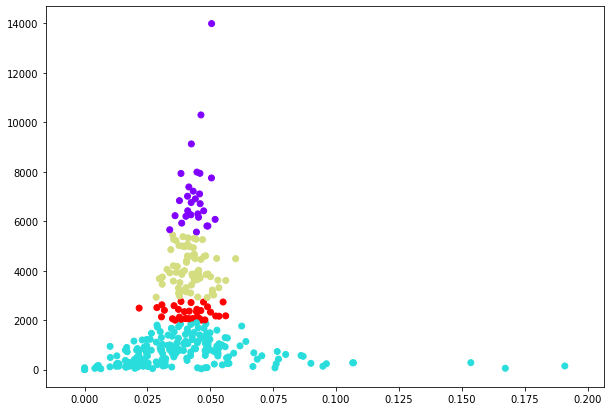

In [98]:
plt.figure(figsize=(10, 7))
plt.scatter(bookings_precpt['PrecipitationHeight'], bookings_precpt['Rentals'], c=cluster.labels_, cmap='rainbow')

### Without Outliers